# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from datetime import datetime

import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
from api_keys import api_key
settings = {"units": "imperial", "appid": api_key}
df =pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date", "Humidity", "Lat","Lng", "Max Temp", "Wind Speed"])
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
from api_keys import api_key
index = 0 

print(f'Beginning Data Retrieval \n-----------------------------')

n = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

record = 0
    
while len(df) < n:
    city_name = city.city_name
    country = city.country_code
    url = target_url + city_name + ',' + country + '&units=' + units + '&APPID=' + api_key
    response = requests.get(url)
    weather = response.json()
    
    #if the city is found in the weather data
    if weather["cod"] == 200:
        print(f'Processing Record {record + 1} | {city_name}' )
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        temp = weather["main"]["temp"]
        humidity = weather["main"]["humidity"]
        cloud = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        date = weather["dt"]
        index = index + 1
            
        # Append data to df columns
        df.set_value(record, "City", city_name)
        df.set_value(record, "Country", country)
        df.set_value(record, "Date", date)
        df.set_value(record, "Lat", latitude)
        df.set_value(record, "Lng", longitude)
        df.set_value(record, "Max Temp", temp)
        df.set_value(record, "Humidity", humidity)
        df.set_value(record, "Cloudiness", cloud)
        df.set_value(record, "Wind Speed", wind)

        record += 1
        
        # Wait between 1-4 seconds before next loop
        time.sleep(random.randint(1, 4))
        
    else:
        print('City not found. Skipping...')
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
)

df.head()

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 1 | kapaa


/Users/delaynabradshaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/delaynabradshaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/delaynabradshaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/delaynabradshaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/delaynabradshaw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:83: FutureWarning: set_value is deprecated and will be removed in a f

Processing Record 2 | upernavik
Processing Record 3 | geraldton
Processing Record 4 | novyye gorki
Processing Record 5 | jamestown
Processing Record 6 | albany
Processing Record 7 | punta arenas
Processing Record 8 | half moon bay
Processing Record 9 | isangel
Processing Record 10 | haian
Processing Record 11 | alofi
City not found. Skipping...
Processing Record 12 | garden city
Processing Record 13 | itarana
Processing Record 14 | hobart
Processing Record 15 | lorengau
Processing Record 16 | cidreira
Processing Record 17 | san felipe
Processing Record 18 | college
Processing Record 19 | iqaluit
Processing Record 20 | rawson
Processing Record 21 | qaanaaq
Processing Record 22 | voskresenskoye
Processing Record 23 | barranca
Processing Record 24 | kapaa
Processing Record 25 | tasiilaq
Processing Record 26 | kodiak
City not found. Skipping...
Processing Record 27 | margate
Processing Record 28 | kapaa
Processing Record 29 | sitka
City not found. Skipping...
Processing Record 30 | rikitea

Processing Record 227 | kodiak
Processing Record 228 | punta arenas
City not found. Skipping...
Processing Record 229 | sumbe
Processing Record 230 | haimen
Processing Record 231 | rikitea
City not found. Skipping...
City not found. Skipping...
Processing Record 232 | yellowknife
Processing Record 233 | hermanus
Processing Record 234 | busselton
Processing Record 235 | cape town
Processing Record 236 | rikitea
Processing Record 237 | cape town
Processing Record 238 | isangel
Processing Record 239 | upernavik
Processing Record 240 | leesburg
Processing Record 241 | imeni poliny osipenko
Processing Record 242 | hermanus
Processing Record 243 | hamilton
Processing Record 244 | vaini
Processing Record 245 | atuona
Processing Record 246 | ponta do sol
Processing Record 247 | castro
Processing Record 248 | suntar
Processing Record 249 | merke
Processing Record 250 | ushuaia
Processing Record 251 | leningradskiy
Processing Record 252 | san luis
Processing Record 253 | busselton
Processing Rec

Processing Record 450 | busselton
City not found. Skipping...
Processing Record 451 | shihezi
Processing Record 452 | shirokiy
Processing Record 453 | teberda
Processing Record 454 | fairbanks
City not found. Skipping...
Processing Record 455 | biak
City not found. Skipping...
Processing Record 456 | avarua
Processing Record 457 | alta floresta
City not found. Skipping...
Processing Record 458 | bambous virieux
Processing Record 459 | hithadhoo
Processing Record 460 | leshukonskoye
Processing Record 461 | mahebourg
Processing Record 462 | castro
Processing Record 463 | yellowknife
Processing Record 464 | gumdag
Processing Record 465 | ngunguru
Processing Record 466 | barrow
Processing Record 467 | chuy
Processing Record 468 | hithadhoo
Processing Record 469 | bluff
Processing Record 470 | hithadhoo
Processing Record 471 | erzin
Processing Record 472 | cape town
Processing Record 473 | skoghall
Processing Record 474 | villarrica
Processing Record 475 | kulhudhuffushi
Processing Record 4

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,75,us,1544331360,55,22.08,-159.32,73.04,24.16
1,upernavik,76,gl,1544332802,100,72.79,-56.15,8.66,10.11
2,geraldton,0,au,1544331600,57,-28.77,114.6,77,21.92
3,novyye gorki,68,ru,1544332808,88,56.73,41.06,17.21,10.18
4,jamestown,92,sh,1544332554,100,-15.94,-5.72,69.23,17.38


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df.to_csv("weatherpy.csv", encoding="utf-8", index=False)

In [9]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,75,us,1544331360,55,22.08,-159.32,73.04,24.16
1,upernavik,76,gl,1544332802,100,72.79,-56.15,8.66,10.11
2,geraldton,0,au,1544331600,57,-28.77,114.6,77,21.92
3,novyye gorki,68,ru,1544332808,88,56.73,41.06,17.21,10.18
4,jamestown,92,sh,1544332554,100,-15.94,-5.72,69.23,17.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

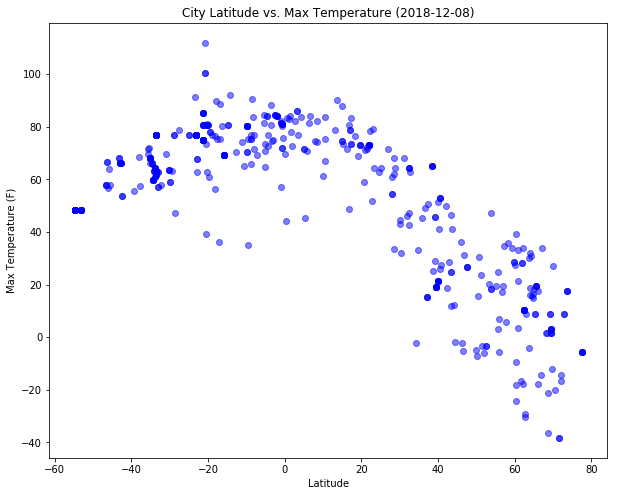

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(df["Lat"], df["Max Temp"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.savefig("Lat_v_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

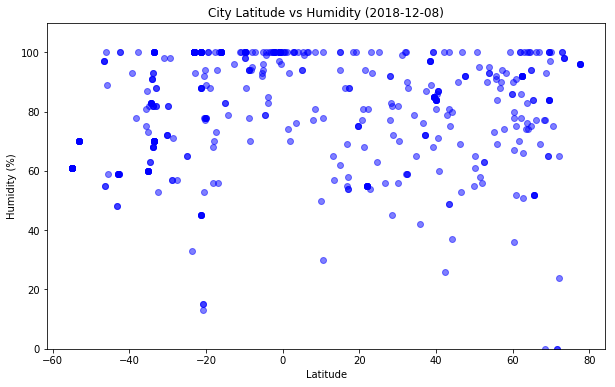

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df["Lat"], df["Humidity"], color='b', alpha=0.5)
plt.ylim(0,110)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("Lat_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

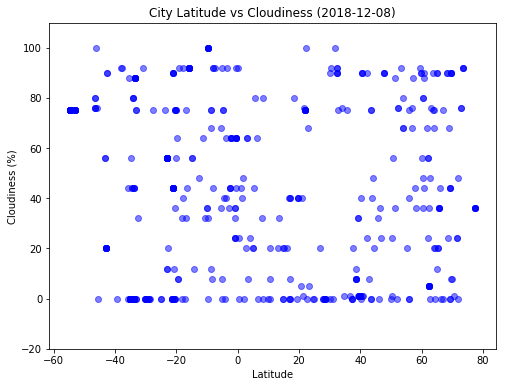

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df["Lat"], df["Cloudiness"], color='b', alpha=0.5)
plt.ylim(-20,(df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("Lat_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

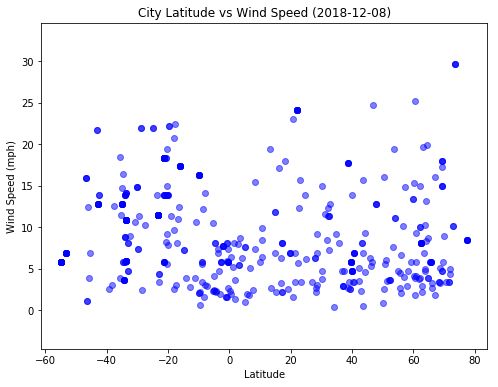

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df["Lat"], df["Wind Speed"], color='b', alpha=0.5)
plt.ylim((df["Wind Speed"].min()-5),(df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("Lat_v_Wind.png")
plt.show()